In [ ]:
# ===============================
# 🐄 MODEL B: BREED CLASSIFIER SETUP
# ===============================

# ===============================
# 📌 STEP 1: Mount Google Drive (if not mounted)
# ===============================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ===============================
# 📌 STEP 2: Setup Paths
# ===============================
import os, zipfile, shutil

zip_path = "/content/drive/MyDrive/dataset.zip"   # same ZIP used before
extract_path = "/content/dataset"

# Extract only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Dataset extracted to: {extract_path}")
else:
    print("✅ Dataset already extracted.")

# Remove __MACOSX folder if present
macosx_path = os.path.join(extract_path, "__MACOSX")
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)
    print("🗑️ Removed __MACOSX folder.")

# ===============================
# 📌 STEP 3: Set Model B Dataset Path
# ===============================
model_b_dir = "/content/dataset/dataset/model_b"  # path for breed classifier

# Verify folders
print(f"📂 Model B folder: {model_b_dir}")
print("📂 Model B classes:", os.listdir(model_b_dir))

# ===============================
# 📌 STEP 4: Import Libraries
# ===============================
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# ===============================
# 📌 STEP 5: Define Transformations
# ===============================
transform_b = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

# ===============================
# 📌 STEP 6: Load Model B Dataset
# ===============================
breed_dataset = datasets.ImageFolder(root=model_b_dir, transform=transform_b)

print(f"✅ Total images in Model B dataset: {len(breed_dataset)}")
print(f"✅ Classes: {breed_dataset.classes}")
print(f"✅ Class-to-Index Mapping: {breed_dataset.class_to_idx}")

# ===============================
# 📌 STEP 7: Train/Val/Test Split
# ===============================
train_size_b = int(0.7 * len(breed_dataset))
val_size_b   = int(0.15 * len(breed_dataset))
test_size_b  = len(breed_dataset) - train_size_b - val_size_b

train_dataset_b, val_dataset_b, test_dataset_b = random_split(
    breed_dataset, [train_size_b, val_size_b, test_size_b]
)

print(f"📊 Split sizes -> Train: {len(train_dataset_b)}, Val: {len(val_dataset_b)}, Test: {len(test_dataset_b)}")

# ===============================
# 📌 STEP 8: Create DataLoaders
# ===============================
batch_size_b = 32

train_dataloader_b = DataLoader(train_dataset_b, batch_size=batch_size_b, shuffle=True)
val_dataloader_b   = DataLoader(val_dataset_b, batch_size=batch_size_b, shuffle=False)
test_dataloader_b  = DataLoader(test_dataset_b, batch_size=batch_size_b, shuffle=False)

print("✅ DataLoaders for Model B ready!")


Mounted at /content/drive
✅ Dataset extracted to: /content/dataset
📂 Model B folder: /content/dataset/dataset/model_b
📂 Model B classes: ['khillari', 'Kasaragod_Cow', 'Hallikar_Cow', 'Hariana', 'Shurti_buffalo', 'banni', 'Nagpuri_buffalo', 'Kankrej_cow', 'toda', 'red_sindhi', 'vechur', 'bargur', 'Malnad_gidda', 'Kangayam_cow', 'Sahiwal_cow', 'Gir', 'Kherigarh', 'Nili_Ravi', 'Deoni_cow', 'Alambadi', 'Tharparkar_cow', 'Amritmahal_cow', 'Rathi', 'Jaffrabadi_Buffalo', 'Mehsana_buffalo', 'Nimari', 'murrah', 'Nagori_cow', 'Umblachery_cow', 'Kenkatha', 'krishna_valley', 'Pulikulam', 'Dangi_cow', 'bhadwari', 'ongole']
✅ Total images in Model B dataset: 4605
✅ Classes: ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo',

In [ ]:
# ===============================
# 📌 STEP 8: Save Model B Class Names to JSON
# ===============================
import json
import os
from torchvision import datasets, transforms

# ✅ Path to Model B dataset (breed classification)
model_b_dir = "/content/dataset/dataset/model_b"

# ✅ Load dataset (only to extract class names)
transform_b = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
cattle_dataset_b = datasets.ImageFolder(root=model_b_dir, transform=transform_b)

# ✅ Extract class names
class_names_b = cattle_dataset_b.classes
print(f"✅ Classes Detected for Model B: {class_names_b}")

# ✅ Save to Google Drive as JSON
classes_path_b = "/content/drive/MyDrive/model_b_classes.json"
with open(classes_path_b, "w") as f:
    json.dump(class_names_b, f)

print(f"✅ Model B classes saved successfully to: {classes_path_b}")


✅ Classes Detected for Model B: ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
✅ Model B classes saved successfully to: /content/drive/MyDrive/model_b_classes.json


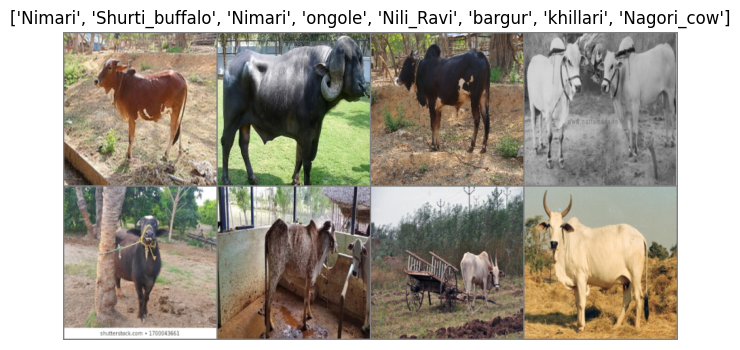

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

# ===============================
# 📌 STEP: Visualize a Batch from Model B
# ===============================

# Get one batch from Model B's DataLoader
images_b, labels_b = next(iter(train_dataloader_b))

# Function to unnormalize and display image grid
def imshow(img, title):
    # Undo normalization (you normalized with mean=0.5, std=0.5)
    img = img / 2 + 0.5
    npimg = img.numpy()

    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Show first 8 images with class names
imshow(
    torchvision.utils.make_grid(images_b[:8], nrow=4, padding=2),
    title=[cattle_dataset_b.classes[labels_b[j]] for j in range(8)]
)


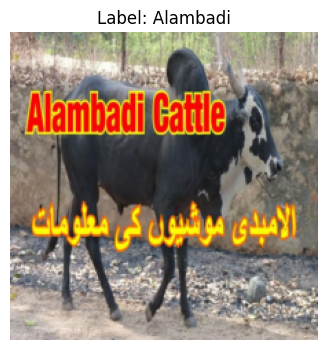

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# Path to Model B dataset
model_a_dir = "/content/dataset/dataset/model_b"

# Load dataset (only for visualization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

# Get first image and label
img, label = cattle_dataset[0]

# Convert tensor → numpy (CHW → HWC)
np_img = img.numpy().transpose((1, 2, 0))

# Undo normalization (mean=0.5, std=0.5)
np_img = np_img * 0.5 + 0.5

# Show image
plt.figure(figsize=(4,4))
plt.imshow(np_img)
plt.title(f"Label: {cattle_dataset.classes[label]}")
plt.axis("off")
plt.show()


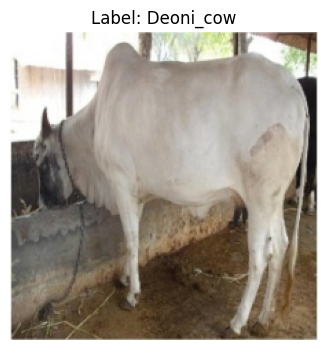

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# -------------------------------
# Model B dataset path
# -------------------------------
model_a_dir = "/content/dataset/dataset/model_b"

# Load dataset (for DataLoader)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
cattle_dataset = datasets.ImageFolder(root=model_a_dir, transform=transform)

from torch.utils.data import DataLoader

# Create DataLoader for training
train_dataloader = DataLoader(cattle_dataset, batch_size=32, shuffle=True)

# -------------------------------
# Get first batch
# -------------------------------
images, labels = next(iter(train_dataloader))

# Pick first image in the batch
img = images[0]
label = labels[0]

# Convert tensor -> numpy (CHW -> HWC) and undo normalization
np_img = img.numpy().transpose((1, 2, 0))
np_img = np_img * 0.5 + 0.5

# Plot
plt.figure(figsize=(4,4))
plt.imshow(np_img)
plt.title(f"Label: {cattle_dataset.classes[label]}")
plt.axis("off")
plt.show()


In [ ]:
# ===============================
# 📌 STEP 1: Import Libraries
# ===============================
from torchvision import datasets, transforms

# ===============================
# 📌 STEP 2: Set Dataset Path for Model B
# ===============================
data_dir = "/content/dataset/dataset/model_b"  # Correct path for Model B

# Verify folder exists
import os
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset path not found: {data_dir}")
print(f"📂 Using dataset root: {data_dir}")
print("📂 Subfolders (classes):", os.listdir(data_dir))

# ===============================
# 📌 STEP 3: Define Transform
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# ===============================
# 📌 STEP 4: Load Dataset
# ===============================
cattle_dataset = datasets.ImageFolder(data_dir, transform=transform)

# ===============================
# 📌 STEP 5: Encode Labels & Show Info
# ===============================
print(f"✅ Total images: {len(cattle_dataset)}")
print(f"✅ Total classes: {len(cattle_dataset.classes)}")
print(f"✅ Class names: {', '.join(cattle_dataset.classes)}")

# Encoded labels (class_name → numeric ID)
encoded_labels = [str(cattle_dataset.class_to_idx[class_name]) for class_name in cattle_dataset.classes]
print(f"✅ Encoded labels: {', '.join(encoded_labels)}")

# Class-to-index mapping dictionary
print(f"✅ Class-to-Index Mapping: {cattle_dataset.class_to_idx}")


📂 Using dataset root: /content/dataset/dataset/model_b
📂 Subfolders (classes): ['Nagori_cow', 'toda', 'banni', 'Malnad_gidda', 'Pulikulam', 'Gir', 'Kankrej_cow', 'bhadwari', 'Nili_Ravi', 'Kherigarh', 'Sahiwal_cow', 'Amritmahal_cow', 'Shurti_buffalo', 'Hariana', 'Nagpuri_buffalo', 'Mehsana_buffalo', 'red_sindhi', 'Kenkatha', 'Rathi', 'ongole', 'Jaffrabadi_Buffalo', 'Tharparkar_cow', 'Deoni_cow', 'Nimari', 'Kangayam_cow', 'Alambadi', 'vechur', 'khillari', 'murrah', 'bargur', 'Kasaragod_Cow', 'Dangi_cow', 'krishna_valley', 'Umblachery_cow', 'Hallikar_Cow']
✅ Total images: 4605
✅ Total classes: 35
✅ Class names: Alambadi, Amritmahal_cow, Dangi_cow, Deoni_cow, Gir, Hallikar_Cow, Hariana, Jaffrabadi_Buffalo, Kangayam_cow, Kankrej_cow, Kasaragod_Cow, Kenkatha, Kherigarh, Malnad_gidda, Mehsana_buffalo, Nagori_cow, Nagpuri_buffalo, Nili_Ravi, Nimari, Pulikulam, Rathi, Sahiwal_cow, Shurti_buffalo, Tharparkar_cow, Umblachery_cow, banni, bargur, bhadwari, khillari, krishna_valley, murrah, ongole, 

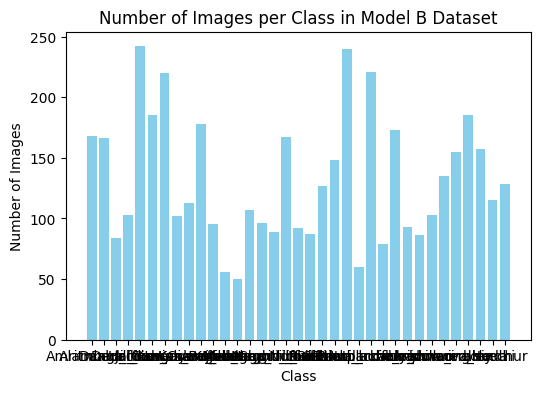

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# -------------------------------
# Label → Class name mapping for Model A
# -------------------------------
label_to_values = {v: k for k, v in cattle_dataset.class_to_idx.items()}

# Count instances of each label in the dataset
all_labels = [label for _, label in cattle_dataset]
label_counts = Counter(all_labels)

# Prepare data for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())
class_names = [label_to_values[label] for label in labels]

# -------------------------------
# Plot bar chart
# -------------------------------
plt.figure(figsize=(6,4))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Model B Dataset')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_image_frame(nrows=1, ncols=1, figsize=(12, 8)):
    """
    Create a matplotlib figure with subplots of specified shape.

    Args:
        nrows (int): Number of rows of subplots.
        ncols (int): Number of columns of subplots.
        figsize (tuple): Figure size (width, height).

    Returns:
        fig (Figure): Matplotlib figure object.
        axs_list (list): Flattened list of axes objects for easy iteration.
    """
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Flatten axes array for easier iteration
    if isinstance(axs, np.ndarray):
        axs_list = axs.flatten()
    else:
        axs_list = [axs]

    return fig, axs_list


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(axs, x, y, xlabels=None, ylabels=None, titles=None, rotation=45, width=0.5):
    """
    Plot bar graphs on provided axes.

    Args:
        axs (list): List of matplotlib axes objects.
        x (list of lists): X values (categories) for each subplot.
        y (list of lists): Y values (counts) for each subplot.
        xlabels (list): Labels for x-axis of each subplot (optional).
        ylabels (list): Labels for y-axis of each subplot (optional).
        titles (list): Titles for each subplot (optional).
        rotation (int): Rotation of x-axis labels.
        width (float): Width of bars.

    Returns:
        None
    """
    # Validate input lengths
    if len(axs) != len(x) or len(x) != len(y):
        raise ValueError("Length of axs, x, and y must be the same")

    # Default labels/titles
    if xlabels is None:
        xlabels = [''] * len(axs)
    if ylabels is None:
        ylabels = [''] * len(axs)
    if titles is None:
        titles = [''] * len(axs)

    for i, ax in enumerate(axs):
        xi = np.arange(len(x[i]))  # positions of bars
        ax.bar(xi, y[i], width=width, edgecolor='white', align='center')
        ax.set_title(titles[i])
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel(ylabels[i])
        ax.set_xticks(xi)
        ax.set_xticklabels(x[i], rotation=rotation)

    plt.tight_layout()
    plt.show()


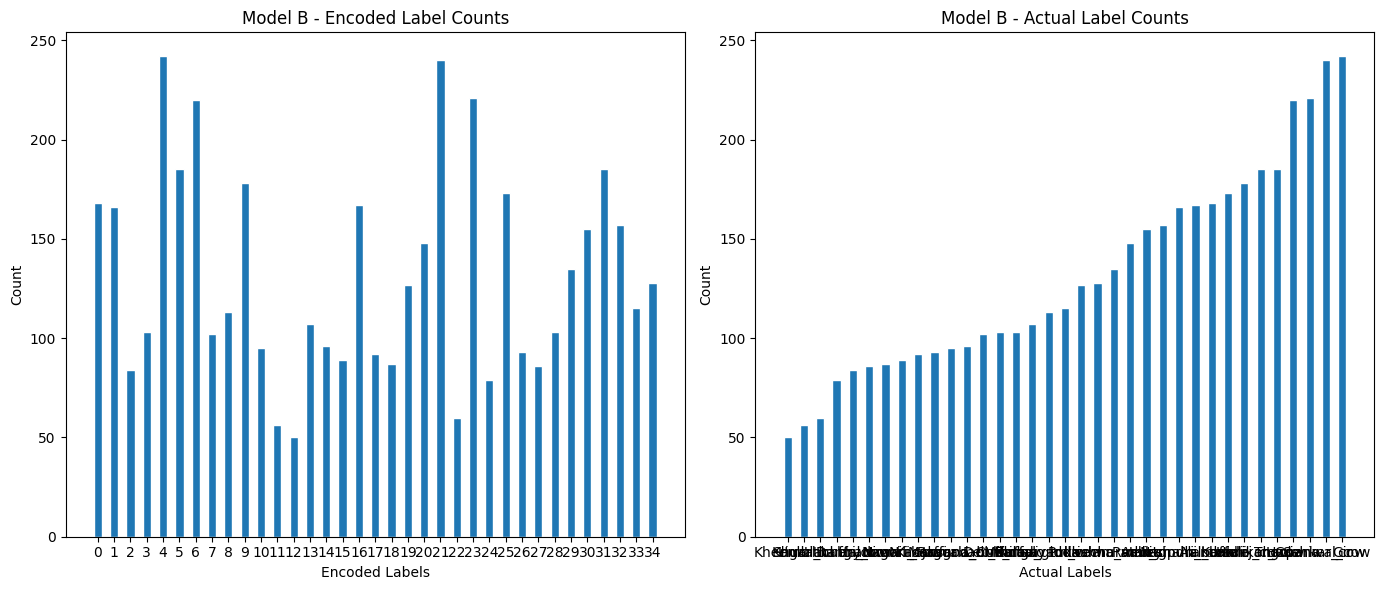

In [ ]:
from collections import Counter

# -------------------------------
# 1️⃣ Count labels in Model A dataset
# -------------------------------
all_labels = [label for _, label in cattle_dataset]
label_counts = Counter(all_labels)

# -------------------------------
# 2️⃣ Prepare encoded labels and counts
# -------------------------------
encoded_labels = list(label_counts.keys())
counts = list(label_counts.values())

# Map encoded labels to actual class names
encoded_to_actual = {v: k for k, v in cattle_dataset.class_to_idx.items()}
actual_label_counts = {encoded_to_actual[k]: v for k, v in label_counts.items()}

# Optional: sort by count
actual_label_counts = dict(sorted(actual_label_counts.items(), key=lambda x: x[1]))

# -------------------------------
# 3️⃣ Create a figure with 1 row, 2 columns
# -------------------------------
fig, axs = get_image_frame(nrows=1, ncols=2, figsize=(14,6))

# -------------------------------
# 4️⃣ Define data for plotting
# -------------------------------
x_values = [list(encoded_labels), list(actual_label_counts.keys())]
y_values = [list(counts), list(actual_label_counts.values())]
xlabels = ['Encoded Labels', 'Actual Labels']
ylabels = ['Count', 'Count']
titles = ['Model B - Encoded Label Counts', 'Model B - Actual Label Counts']

# -------------------------------
# 5️⃣ Plot side-by-side graphs
# -------------------------------
plot_graph(axs, x_values, y_values, xlabels=xlabels, ylabels=ylabels, titles=titles, rotation=0)


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model B dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_b"  # Correct path for Model B

# -------------------------------
# 2️⃣ Transform: Resize, ToTensor, Normalize
# -------------------------------
transform_b = transforms.Compose([
    transforms.Resize((224, 224)),           # Resize all images to 224x224
    transforms.ToTensor(),                   # Convert image to tensor (C,H,W), pixel values [0,1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], # Normalize to [-1,1]
                         std=[0.5, 0.5, 0.5])
])

# -------------------------------
# 3️⃣ Load Model B dataset
# -------------------------------
model_b_dataset = ImageFolder(root=data_path, transform=transform_b)

# -------------------------------
# 4️⃣ Inspect first image
# -------------------------------
image_tensor, label = model_b_dataset[0]

print("✅ Tensor shape (C,H,W):", image_tensor.shape)
print("✅ Pixel value range:", image_tensor.min().item(), "to", image_tensor.max().item())
print("✅ Encoded label:", label)                   # 0, 1, 2, ... (depending on breed count)
print("✅ Class name:", model_b_dataset.classes[label])  # Breed name (e.g., 'Gir', 'Sahiwal', etc.)


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Pixel value range: -1.0 to 1.0
✅ Encoded label: 0
✅ Class name: Alambadi


Number of images: 5


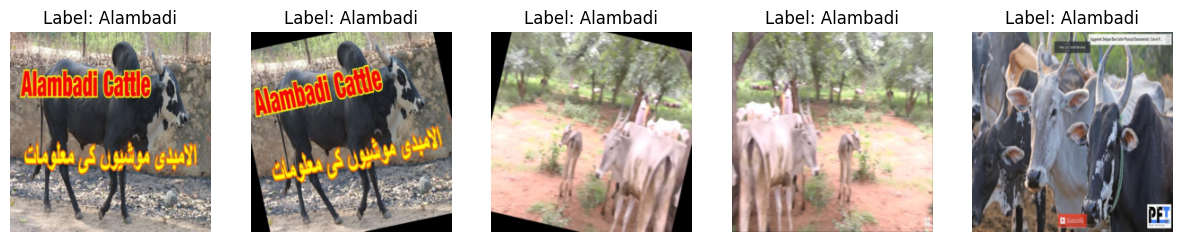

In [ ]:
import matplotlib.pyplot as plt

def display_images_from_tensor(tensors, labels, class_names=None):
    """
    Display images from PyTorch tensors in a row.

    Args:
        tensors (list or tensor): List of image tensors (C,H,W) or a batch tensor.
        labels (list or tensor): Corresponding labels (encoded integers or strings).
        class_names (list, optional): List of class names for encoded labels.
    """
    num_images = len(tensors)
    print(f"Number of images: {num_images}")

    # Get a figure and axes using previously defined helper
    fig, axs = get_image_frame(1, num_images, figsize=(3*num_images, 4))

    for i in range(num_images):
        # Convert tensor to numpy for plotting (C,H,W → H,W,C)
        np_img = tensors[i].permute(1, 2, 0).numpy()

        # If pixel values are normalized to [-1,1], unnormalize them
        if np_img.min() < 0 or np_img.max() > 1:
            np_img = (np_img + 1) / 2

        axs[i].imshow(np_img)

        # Display label (use class_names if provided)
        label_name = class_names[labels[i]] if class_names is not None else labels[i]
        axs[i].set_title(f"Label: {label_name}")
        axs[i].axis('off')

    plt.show()

# -------------------------------
# Example usage for Model b
# -------------------------------
# Get first 5 images and labels from model_a_dataset
tensors = [model_b_dataset[i][0] for i in range(5)]
labels = [model_b_dataset[i][1] for i in range(5)]

# Display images with class names
display_images_from_tensor(tensors, labels, class_names=model_b_dataset.classes)



In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model B dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_b"  # Model B folder (breed classification)

# -------------------------------
# 2️⃣ Define transformations
# -------------------------------
transformations_chain_b = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor()            # Convert to tensor (C,H,W), pixel values [0,1]
])

# -------------------------------
# 3️⃣ Load Model B dataset
# -------------------------------
model_b_dataset_transformed = ImageFolder(root=data_path, transform=transformations_chain_b)

# -------------------------------
# 4️⃣ Inspect first image
# -------------------------------
img, label = model_b_dataset_transformed[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_b_dataset_transformed.classes[label])  # e.g., 'Sahiwal', 'Gir', etc.

# -------------------------------
# 5️⃣ Mapping from encoded label → actual class name
# -------------------------------
encoded_labels_to_actual_labels_b = {v: k for k, v in model_b_dataset_transformed.class_to_idx.items()}
print("✅ Encoded label → Class name mapping:", encoded_labels_to_actual_labels_b)


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Encoded label: 0
✅ Class name: Alambadi
✅ Encoded label → Class name mapping: {0: 'Alambadi', 1: 'Amritmahal_cow', 2: 'Dangi_cow', 3: 'Deoni_cow', 4: 'Gir', 5: 'Hallikar_Cow', 6: 'Hariana', 7: 'Jaffrabadi_Buffalo', 8: 'Kangayam_cow', 9: 'Kankrej_cow', 10: 'Kasaragod_Cow', 11: 'Kenkatha', 12: 'Kherigarh', 13: 'Malnad_gidda', 14: 'Mehsana_buffalo', 15: 'Nagori_cow', 16: 'Nagpuri_buffalo', 17: 'Nili_Ravi', 18: 'Nimari', 19: 'Pulikulam', 20: 'Rathi', 21: 'Sahiwal_cow', 22: 'Shurti_buffalo', 23: 'Tharparkar_cow', 24: 'Umblachery_cow', 25: 'banni', 26: 'bargur', 27: 'bhadwari', 28: 'khillari', 29: 'krishna_valley', 30: 'murrah', 31: 'ongole', 32: 'red_sindhi', 33: 'toda', 34: 'vechur'}


Actual label : Alambadi
Encoded label : 0
Number of images: 2


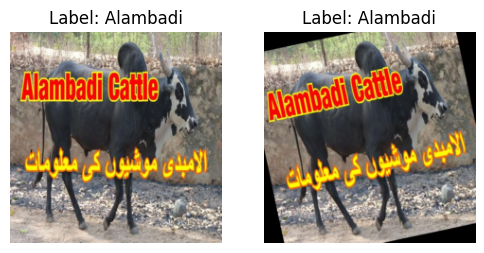

Actual label : Amritmahal_cow
Encoded label : 1
Number of images: 2


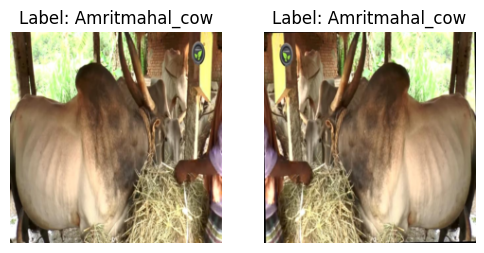

In [ ]:
num_of_iteration = 2  # Number of classes tp display

for encoded_label, actual_label in encoded_labels_to_actual_labels_b.items():
    print(f"Actual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors for this label in Model B dataset
    selected_tensors = [t for t, i in model_b_dataset_transformed if i == int(encoded_label)]
    display_count = min(2, len(selected_tensors))  # Display max 2 images

    # Display first 2 images
    display_images_from_tensor(selected_tensors[:display_count],
                               [int(encoded_label)]*display_count,
                               class_names=model_b_dataset_transformed.classes)

    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([3, 224, 224])
✅ Encoded label: 0
✅ Class name: Alambadi

Actual label : Alambadi
Encoded label : 0
Number of images in this category: 168
Number of images: 2


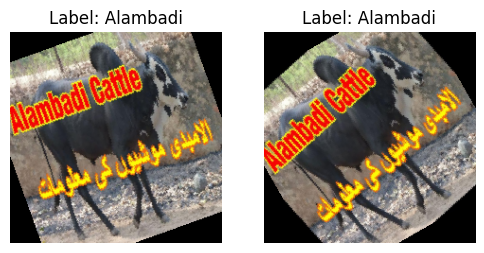


Actual label : Amritmahal_cow
Encoded label : 1
Number of images in this category: 166
Number of images: 2


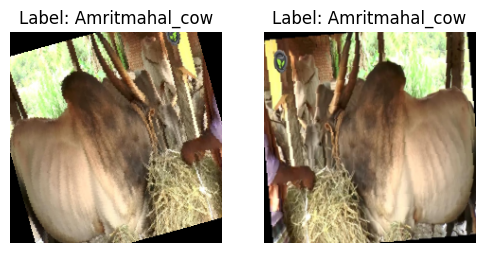

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformations for augmentation
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Resize((224, 224)),       # Resize first
    transforms.RandomRotation(30),       # Rotate up to ±30 degrees
    transforms.ToTensor()                # Convert to tensor last
])

# -------------------------------
# 2️⃣ Load Model B dataset with transformations
# -------------------------------
model_b_dataset_rotated = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Check first image
# -------------------------------
img, label = model_b_dataset_rotated[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_b_dataset_rotated.classes[label])

# -------------------------------
# 4️⃣ Display images per category
# -------------------------------
images_per_category = 2
num_of_iteration = 2  # Number of categories to display

for encoded_label, actual_label in encoded_labels_to_actual_labels_b.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors belonging to this label
    selected_tensors = [t for t, i in model_b_dataset_rotated if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images using the display function
    display_images_from_tensor(
        selected_tensors[:display_count],
        [int(encoded_label)]*display_count,        # Pass encoded labels for proper mapping
        class_names=model_b_dataset_rotated.classes
    )

    # Stop after the specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([3, 32, 32])
✅ Encoded label: 0
✅ Class name: Alambadi

Actual label : Alambadi
Encoded label : 0
Number of images in this category: 168
Number of images: 2


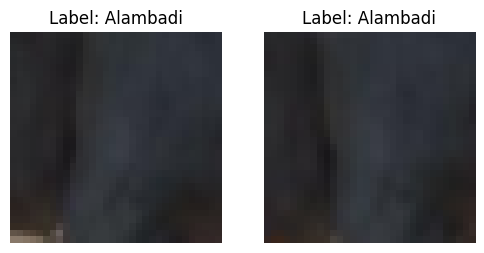


Actual label : Amritmahal_cow
Encoded label : 1
Number of images in this category: 166
Number of images: 2


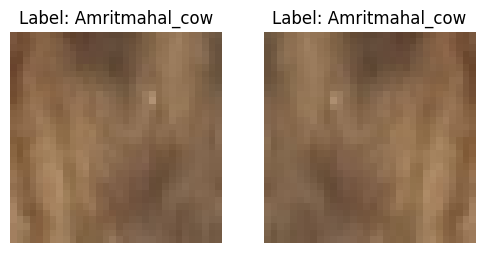

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformations for cropping
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Resize((224, 224)),      # Resize first
    transforms.CenterCrop(32),          # Then crop the center
    transforms.ToTensor()               # Convert to tensor last
])

# -------------------------------
# 2️⃣ Load Model B dataset with transformations
# -------------------------------
model_b_dataset_cropped = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Check first image
# -------------------------------
img, label = model_b_dataset_cropped[0]
print("✅ Tensor shape (C,H,W):", img.shape)
print("✅ Encoded label:", label)
print("✅ Class name:", model_b_dataset_cropped.classes[label])

# -------------------------------
# 4️⃣ Display images per category
# -------------------------------
images_per_category = 2
num_of_iteration = 2  # Number of categories to display

for encoded_label, actual_label in encoded_labels_to_actual_labels_b.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors belonging to this label
    selected_tensors = [t for t, i in model_b_dataset_cropped if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images using the display function
    display_images_from_tensor(
        selected_tensors[:display_count],
        [int(encoded_label)]*display_count,        # Pass encoded labels for proper mapping
        class_names=model_b_dataset_cropped.classes
    )

    # Stop after the specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break


✅ Tensor shape (C,H,W): torch.Size([1, 224, 224])
✅ Encoded label: 0
✅ Class name: Alambadi

Actual label : Alambadi
Encoded label : 0
Number of images in this category: 168
Number of images: 2


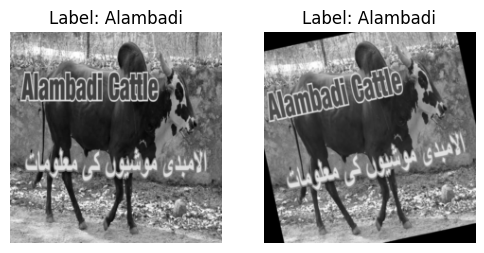


Actual label : Amritmahal_cow
Encoded label : 1
Number of images in this category: 166
Number of images: 2


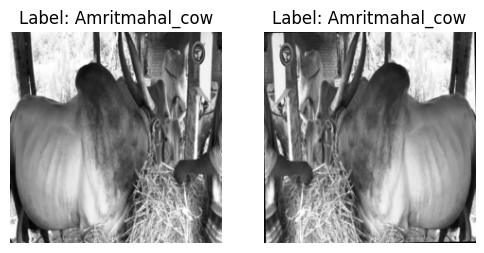

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Define grayscale transformations
# -------------------------------
transformations_chain = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),                # Resize image
    transforms.ToTensor()                         # Convert to tensor
])

# -------------------------------
# 2️⃣ Load Model B dataset (grayscale)
# -------------------------------
model_b_dataset_gray = ImageFolder(root=data_path, transform=transformations_chain)

# -------------------------------
# 3️⃣ Inspect first image
# -------------------------------
img, label = model_b_dataset_gray[0]
print("✅ Tensor shape (C,H,W):", img.shape)  # Should be [1, 224, 224]
print("✅ Encoded label:", label)
print("✅ Class name:", model_b_dataset_gray.classes[label])

# -------------------------------
# 4️⃣ Display function for grayscale or RGB images
# -------------------------------
def display_images_from_tensor(tensors, labels, class_names=None):
    num_images = len(tensors)
    print(f"Number of images: {num_images}")

    fig, axs = get_image_frame(1, num_images, figsize=(3*num_images, 4))

    for i in range(num_images):
        img = tensors[i]
        # Convert tensor to numpy for plotting
        if img.shape[0] == 1:  # Grayscale (C=1)
            np_img = img.squeeze(0).numpy()
            cmap = 'gray'
        else:  # RGB (C=3)
            np_img = img.permute(1, 2, 0).numpy()
            cmap = None

        axs[i].imshow(np_img, cmap=cmap)
        label_name = class_names[labels[i]] if class_names is not None else labels[i]
        axs[i].set_title(f"Label: {label_name}")
        axs[i].axis('off')

    plt.show()

# -------------------------------
# 5️⃣ Example: display first 2 images per class
# -------------------------------
images_per_category = 2
num_of_iteration = 2

for encoded_label, actual_label in encoded_labels_to_actual_labels_b.items():
    print(f"\nActual label : {actual_label}")
    print(f"Encoded label : {encoded_label}")

    # Select all tensors for this label
    selected_tensors = [t for t, i in model_b_dataset_gray if i == int(encoded_label)]
    print("Number of images in this category:", len(selected_tensors))

    # Number of images to display
    display_count = min(images_per_category, len(selected_tensors))

    # Display images
    tensors_to_display = selected_tensors[:display_count]
    display_images_from_tensor(
        tensors_to_display,
        [int(encoded_label)]*display_count,
        class_names=model_b_dataset_gray.classes
    )

    # Stop after specified number of categories
    num_of_iteration -= 1
    if num_of_iteration == 0:
        break



Actual label : Kherigarh
Encoded label : 12
Number of images in this category: 50
Number of images: 2


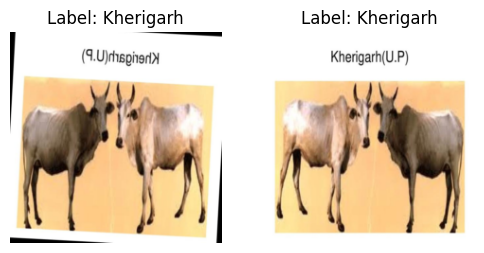


Actual label : Kankrej_cow
Encoded label : 9
Number of images in this category: 178
Number of images: 2


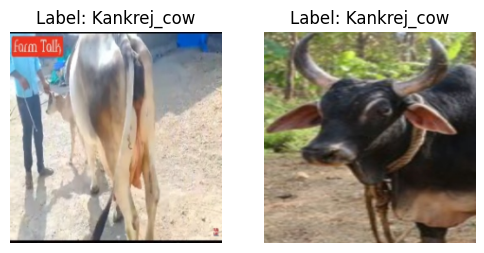

In [ ]:
from torchvision import transforms
import random

# -------------------------------
# 1️⃣ Get a composed transform
# -------------------------------
def get_transform(transform_list):
    """
    Returns a composed torchvision transform from a list of transformations.

    Args:
        transform_list (list): List of torchvision transform objects.

    Returns:
        torchvision.transforms.Compose: Composed transformation.
    """
    if not isinstance(transform_list, list):
        raise TypeError("Expected a list of torchvision transforms")

    if len(transform_list) == 0:
        raise ValueError("Transform list cannot be empty")

    return transforms.Compose(transform_list)

# Example usage for Model B
model_b_transform = get_transform([
    transforms.Resize((256, 256)),             # Resize all images to 256x256 (different from Model A)
    transforms.CenterCrop(224),                # Optional: crop to 224x224
    transforms.ToTensor(),                     # Convert to tensor
    transforms.Normalize(mean=[0.485,0.456,0.406], # Standard ImageNet normalization
                         std=[0.229,0.224,0.225])
])

# -------------------------------
# 2️⃣ Display sample images function (same as Model A)
# -------------------------------
def display_sample_images(dataset, encoded_labels_to_actual_labels, num_of_labels=2, images_per_label=2):
    """
    Display sample transformed images from a dataset.

    Args:
        dataset (ImageFolder): PyTorch dataset with transformed images.
        encoded_labels_to_actual_labels (dict): Mapping from encoded labels to actual class names.
        num_of_labels (int): Number of random labels to display.
        images_per_label (int): Number of images to display per label.
    """
    # List of all encoded labels
    label_list = list(encoded_labels_to_actual_labels.keys())

    # Randomly select labels
    random_label_list = random.sample(label_list, min(num_of_labels, len(label_list)))

    for label in random_label_list:
        actual_label = encoded_labels_to_actual_labels[label]
        print(f"\nActual label : {actual_label}")
        print(f"Encoded label : {label}")

        # Select all images for this label
        selected_tensors = [t for t, i in dataset if i == int(label)]
        print("Number of images in this category:", len(selected_tensors))

        # Limit to the number of images per label
        display_count = min(images_per_label, len(selected_tensors))

        # Display images using previously defined function
        tensors_to_display = selected_tensors[:display_count]
        display_images_from_tensor(
            tensors_to_display,
            [int(label)]*display_count,
            class_names=dataset.classes
        )

# -------------------------------
# 3️⃣ Example usage for Model B
# -------------------------------
display_sample_images(
    dataset=model_b_dataset_transformed,                   # Model B dataset
    encoded_labels_to_actual_labels=encoded_labels_to_actual_labels_b,  # Mapping {0:'cattle',1:'non_cattle'}
    num_of_labels=2,                                       # Randomly pick 2 classes
    images_per_label=2                                     # Display 2 images per class
)



Actual label : Rathi
Encoded label : 20


Number of images in this category: 148
Number of images: 2


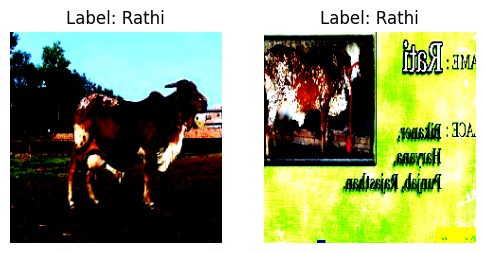


Actual label : Deoni_cow
Encoded label : 3


Number of images in this category: 103
Number of images: 2


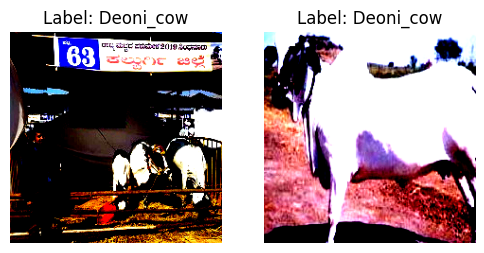

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Define transformation chain for Model B
# -------------------------------
model_b_transformation_chain = get_transform([
    transforms.Resize((256, 256)),                 # Resize all images
    transforms.CenterCrop(224),                    # Crop to 224x224
    transforms.RandomHorizontalFlip(),            # Random horizontal flip for augmentation
    transforms.ToTensor(),                         # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Standard ImageNet normalization
                         std=[0.229, 0.224, 0.225])
])

# -------------------------------
# 2️⃣ Apply transformation to Model B dataset
# -------------------------------
model_b_transformed_dataset = ImageFolder(root=data_path, transform=model_b_transformation_chain)

# -------------------------------
# 3️⃣ Display sample images
# -------------------------------
display_sample_images(
    dataset=model_b_transformed_dataset,
    encoded_labels_to_actual_labels=encoded_labels_to_actual_labels_b,  # {0:'cattle',1:'non_cattle'}
    num_of_labels=2,          # Display 2 classes
    images_per_label=2        # 2 images per class
)


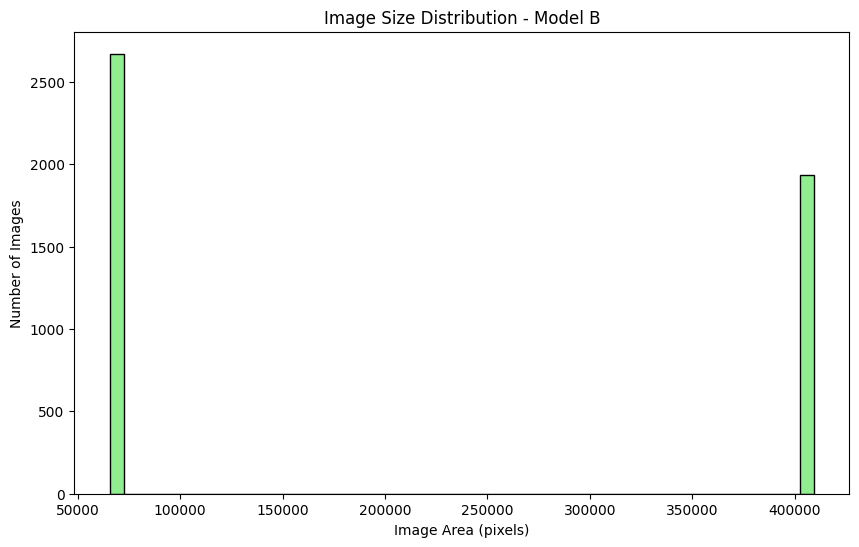

In [ ]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Path to Model B dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_b"  # Model B folder (cattle vs non_cattle)

# -------------------------------
# 2️⃣ Load dataset without transforms to get original image sizes
# -------------------------------
dataset_no_transform = ImageFolder(root=data_path, transform=None)

# -------------------------------
# 3️⃣ Extract image sizes (width × height)
# -------------------------------
sizes = [img[0].size[0] * img[0].size[1] for img in dataset_no_transform]

# -------------------------------
# 4️⃣ Plot histogram of image areas
# -------------------------------
plt.figure(figsize=(10,6))
plt.hist(sizes, bins=50, color='lightgreen', edgecolor='black')
plt.title('Image Size Distribution - Model B')
plt.xlabel('Image Area (pixels)')
plt.ylabel('Number of Images')
plt.show()


/tmp/ipython-input-3868245327.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  images_matrix = torch.tensor(images).numpy()


Image matrix shape: (4605, 150528)
Transformed PCA shape: (4605, 50)


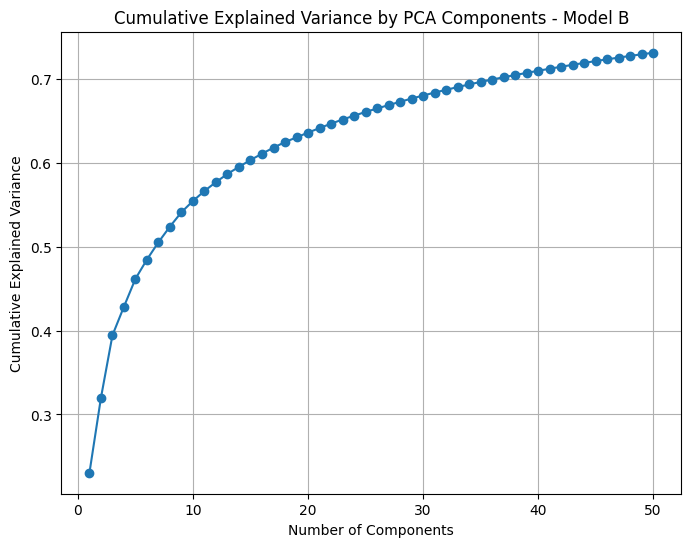

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model B dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_b"  # Model B folder (cattle vs non_cattle)

# -------------------------------
# 2️⃣ Load dataset with normalization
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

model_b_dataset = ImageFolder(root=data_path, transform=transform)

# -------------------------------
# 3️⃣ Collect flattened images for PCA
# -------------------------------
images = []
for img, _ in model_b_dataset:
    img = (img + 1) / 2  # Unnormalize
    images.append(img.view(-1).numpy())

images_matrix = torch.tensor(images).numpy()
print(f"Image matrix shape: {images_matrix.shape}")  # (num_images, num_pixels)

# -------------------------------
# 4️⃣ Apply PCA
# -------------------------------
pca = PCA(n_components=50)
images_pca = pca.fit_transform(images_matrix)
print(f"Transformed PCA shape: {images_pca.shape}")  # (num_images, 50)

# -------------------------------
# 5️⃣ Plot cumulative explained variance
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(range(1, 51), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components - Model B")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision import transforms

# -------------------------------
# 1️⃣ Path to Model B dataset
# -------------------------------
data_path = "/content/dataset/dataset/model_b"

# -------------------------------
# 2️⃣ Define transformations
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

# -------------------------------
# 3️⃣ Load Model B dataset
# -------------------------------
model_b_dataset = ImageFolder(root=data_path, transform=transform)

# -------------------------------
# 4️⃣ Create DataLoader for batching
# -------------------------------
loader = torch.utils.data.DataLoader(model_b_dataset, batch_size=32, shuffle=False)

# -------------------------------
# 5️⃣ Flatten and collect all images
# -------------------------------
all_images = []
for imgs, _ in loader:
    imgs = (imgs + 1) / 2  # Unnormalize to [0,1]
    batch_flattened = imgs.view(imgs.size(0), -1).numpy()
    all_images.append(batch_flattened)

all_images = np.vstack(all_images)
print("✅ Shape of data matrix for PCA (Model B):", all_images.shape)

# -------------------------------
# 6️⃣ Apply PCA (reduce to 2D)
# -------------------------------
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_images)
print("✅ Shape of reduced data (Model B):", reduced_data.shape)


✅ Shape of data matrix for PCA (Model B): (4605, 150528)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import random
import os

# ============================================================
# 1️⃣ Dataset Path & Transformations for Model B
# ============================================================
data_dir = "/content/dataset/dataset/model_b"  # Model B (cattle vs non_cattle)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet normalization
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 2️⃣ Train/Val/Test Split Function (same as Model A)
# ============================================================
def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
    val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32, shuffle=False)
    test_loader  = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)

    print(f"📊 Split sizes → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = train_val_test_split(dataset)

# ============================================================
# 3️⃣ Load & Prepare ResNet50 Model
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

resnet = models.resnet50(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)  # 2 classes: cattle / non_cattle
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=1e-4)

# ============================================================
# 4️⃣ Training Loop
# ============================================================
num_epochs = 10
best_val_acc = 0
save_path = "/content/drive/MyDrive/best_resnet_model_b.pth"  # save separately from Model A

for epoch in range(num_epochs):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # ---------------- Validation ----------------
    resnet.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(resnet.state_dict(), save_path)

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Acc: {val_acc:.2f}%")

print(f"✅ Training complete for Model B! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


✅ Classes detected (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
📊 Split sizes → Train: 3671, Val: 444, Test: 490
💻 Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


📅 Epoch 1/10 | Train Loss: 2.4021 | Train Acc: 33.15% | Val Acc: 52.93%
📅 Epoch 2/10 | Train Loss: 1.1119 | Train Acc: 69.30% | Val Acc: 60.59%
📅 Epoch 3/10 | Train Loss: 0.4949 | Train Acc: 87.80% | Val Acc: 64.86%
📅 Epoch 4/10 | Train Loss: 0.2614 | Train Acc: 94.12% | Val Acc: 64.41%
📅 Epoch 5/10 | Train Loss: 0.1913 | Train Acc: 95.70% | Val Acc: 62.39%
📅 Epoch 6/10 | Train Loss: 0.1584 | Train Acc: 95.91% | Val Acc: 63.96%
📅 Epoch 7/10 | Train Loss: 0.1175 | Train Acc: 97.25% | Val Acc: 64.86%
📅 Epoch 8/10 | Train Loss: 0.1001 | Train Acc: 97.41% | Val Acc: 67.34%
📅 Epoch 9/10 | Train Loss: 0.0814 | Train Acc: 97.66% | Val Acc: 65.09%
📅 Epoch 10/10 | Train Loss: 0.0856 | Train Acc: 97.47% | Val Acc: 64.19%
✅ Training complete for Model B! Best Validation Accuracy: 67.34%
💾 Best model saved at: /content/drive/MyDrive/best_resnet_model_b.pth


In [ ]:
 import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import random
import os

# ============================================================
# 1️⃣ Dataset Path & Augmented Transformations
# ============================================================
data_dir = "/content/dataset/dataset/model_b"

# Data augmentation to prevent overfitting
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),       # random flip
    transforms.RandomRotation(15),           # small rotations
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # color variation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 2️⃣ Train/Val/Test Split (stratified)
# ============================================================
def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
    val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32, shuffle=False)
    test_loader  = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)

    print(f"📊 Split sizes → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = train_val_test_split(dataset)

# ============================================================
# 3️⃣ Load & Prepare ResNet50 with Fine-tuning
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

resnet = models.resnet50(pretrained=True)

# ---------------- Freeze backbone initially ----------------
for param in resnet.parameters():
    param.requires_grad = False

# Replace the classifier (fc layer) for our 2 classes
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),      # dropout to reduce overfitting
    nn.Linear(256, num_classes)
)
resnet = resnet.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=1e-4, weight_decay=1e-4)  # weight_decay adds regularization

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

# ============================================================
# 4️⃣ Training Loop with Validation & Fine-tuning
# ============================================================
num_epochs = 15
best_val_acc = 0
save_path = "/content/drive/MyDrive/best_resnet_model_b_finetune.pth"

for epoch in range(num_epochs):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # ---------------- Validation ----------------
    resnet.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total

    # Adjust learning rate based on validation accuracy
    scheduler.step(val_acc)

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(resnet.state_dict(), save_path)

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Acc: {val_acc:.2f}%")

print(f"✅ Training complete! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


✅ Classes detected (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
📊 Split sizes → Train: 3671, Val: 444, Test: 490
💻 Using device: cuda
📅 Epoch 1/15 | Train Loss: 3.4679 | Train Acc: 6.81% | Val Acc: 13.06%
📅 Epoch 2/15 | Train Loss: 3.2982 | Train Acc: 13.32% | Val Acc: 18.24%
📅 Epoch 3/15 | Train Loss: 3.1280 | Train Acc: 16.34% | Val Acc: 19.37%
📅 Epoch 4/15 | Train Loss: 2.9700 | Train Acc: 19.26% | Val Acc: 24.77%
📅 Epoch 5/15 | Train Loss: 2.8378 | Train Acc: 21.25% | Val Acc: 28.38%
📅 Epoch 6/15 | Train Loss: 2.7228 | Train Acc: 23.54% | Val Acc: 

In [ ]:
 import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import random

# ============================================================
# 1️⃣ Dataset Path & Moderate Augmentation
# ============================================================
data_dir = "/content/dataset/dataset/model_b"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),       # mild augmentation
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 2️⃣ Train/Val/Test Split (stratified)
# ============================================================
def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
    val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32, shuffle=False)
    test_loader  = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)

    print(f"📊 Split sizes → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = train_val_test_split(dataset)

# ============================================================
# 3️⃣ Load ResNet50 and Fine-tune last layers
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

resnet = models.resnet50(pretrained=True)

# Freeze all layers first
for param in resnet.parameters():
    param.requires_grad = False

# Unfreeze layer3, layer4 and fc for fine-tuning
for name, param in resnet.named_parameters():
    if "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True

# Replace the classifier
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)
resnet = resnet.to(device)

# ============================================================
# 4️⃣ Loss, Optimizer, Scheduler
# ============================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

# ============================================================
# 5️⃣ Training Loop
# ============================================================
num_epochs = 25
best_val_acc = 0
save_path = "/content/drive/MyDrive/best_resnet_model_b_35classes.pth"

for epoch in range(num_epochs):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # ---------------- Validation ----------------
    resnet.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(resnet.state_dict(), save_path)

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Acc: {val_acc:.2f}%")

 print(f"✅ Training complete! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


✅ Classes detected (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
📊 Split sizes → Train: 3671, Val: 444, Test: 490
💻 Using device: cuda
📅 Epoch 1/25 | Train Loss: 2.8688 | Train Acc: 20.68% | Val Acc: 37.39%
📅 Epoch 2/25 | Train Loss: 1.8355 | Train Acc: 46.28% | Val Acc: 52.25%
📅 Epoch 3/25 | Train Loss: 1.2464 | Train Acc: 63.23% | Val Acc: 58.56%
📅 Epoch 4/25 | Train Loss: 0.8544 | Train Acc: 75.57% | Val Acc: 61.04%
📅 Epoch 5/25 | Train Loss: 0.5860 | Train Acc: 83.85% | Val Acc: 59.46%
📅 Epoch 6/25 | Train Loss: 0.4498 | Train Acc: 87.61% | Val Acc:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import random
import copy

# ============================================================
# 1️⃣ Dataset Path & Stronger Augmentation
# ============================================================
data_dir = "/content/dataset/dataset/model_b"

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
class_names = full_dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 2️⃣ Train/Val/Test Split
# ============================================================
def train_val_test_split(dataset, val_frac=0.1, test_frac=0.1):
    train_frac = 1 - val_frac - test_frac
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int(train_frac * n_total)
        n_val   = int(val_frac * n_total)
        train_idx.extend(indices[:n_train])
        val_idx.extend(indices[n_train:n_train+n_val])
        test_idx.extend(indices[n_train+n_val:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
    val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32, shuffle=False)
    test_loader  = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)

    print(f"📊 Split sizes → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

# For val/test, use val_transform instead of train_transform
train_indices, val_indices, test_indices = [], [], []
label_to_indices = defaultdict(list)
for idx, (_, label) in enumerate(full_dataset):
    label_to_indices[label].append(idx)

for label, indices in label_to_indices.items():
    random.shuffle(indices)
    n_total = len(indices)
    n_val = int(0.1 * n_total)
    n_test = int(0.1 * n_total)
    n_train = n_total - n_val - n_test
    train_indices.extend(indices[:n_train])
    val_indices.extend(indices[n_train:n_train+n_val])
    test_indices.extend(indices[n_train+n_val:])

train_dataset = Subset(copy.deepcopy(full_dataset), train_indices)
train_dataset.dataset.transform = train_transform

val_dataset = Subset(copy.deepcopy(full_dataset), val_indices)
val_dataset.dataset.transform = val_transform

test_dataset = Subset(copy.deepcopy(full_dataset), test_indices)
test_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ============================================================
# 3️⃣ Load ResNet50 and Fine-tune
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

resnet = models.resnet50(pretrained=True)

# Freeze all layers except layer4 and fc
for name, param in resnet.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Replace classifier
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)
resnet = resnet.to(device)

# ============================================================
# 4️⃣ Loss, Optimizer, Scheduler
# ============================================================
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # smoother labels help generalization
optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()), lr=5e-5, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

# ============================================================
# 5️⃣ Training Loop with Early Stopping
# ============================================================
num_epochs = 25
best_val_acc = 0
patience = 5
counter = 0
save_path = "/content/drive/MyDrive/best_resnet_model_b_35classes_improved.pth"

for epoch in range(num_epochs):
    resnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # Validation
    resnet.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter = 0
        torch.save(resnet.state_dict(), save_path)
    else:
        counter += 1

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Acc: {val_acc:.2f}%")

    if counter >= patience:
        print(f"⏹️ Early stopping triggered after {epoch+1} epochs!")
        break

print(f"✅ Training complete! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


✅ Classes detected (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
💻 Using device: cuda
📅 Epoch 1/25 | Train Loss: 3.2430 | Train Acc: 13.80% | Val Acc: 23.87%
📅 Epoch 2/25 | Train Loss: 2.7079 | Train Acc: 28.36% | Val Acc: 37.84%
📅 Epoch 3/25 | Train Loss: 2.3544 | Train Acc: 40.54% | Val Acc: 45.50%
📅 Epoch 4/25 | Train Loss: 2.0611 | Train Acc: 51.20% | Val Acc: 49.32%
📅 Epoch 5/25 | Train Loss: 1.8378 | Train Acc: 60.26% | Val Acc: 55.63%
📅 Epoch 6/25 | Train Loss: 1.6626 | Train Acc: 66.53% | Val Acc: 56.31%
📅 Epoch 7/25 | Train Loss: 1.5307 | Train

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model B loaded successfully!
📂 Classes (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']


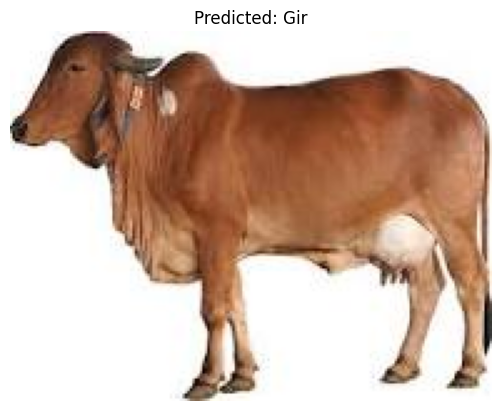

📸 image 1.jpg → 🧠 Predicted as: Gir


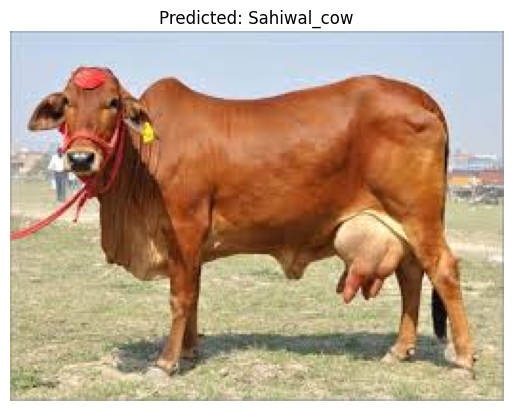

📸 sahiwal.jpg → 🧠 Predicted as: Sahiwal_cow


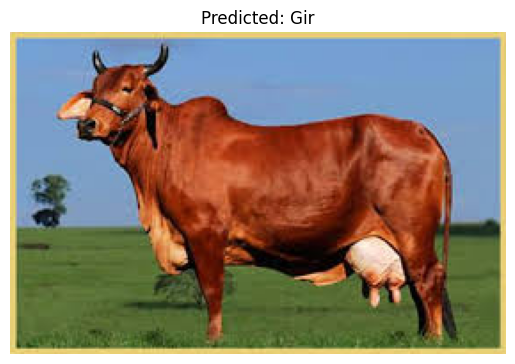

📸 image2.jpg → 🧠 Predicted as: Gir


In [ ]:
# ===============================
# 📌 STEP 9: Manual Testing of Model B
# ===============================

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# 1️⃣ Load the trained Model B
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ⚠️ Update this: use your Model B dataset directory
data_dir_b = "/content/dataset/dataset/model_b"

# Load the dataset just to extract class names (same as during training)
from torchvision import datasets
temp_dataset_b = datasets.ImageFolder(root=data_dir_b)
num_classes_b = len(temp_dataset_b.classes)
class_names_b = temp_dataset_b.classes

# Initialize the same architecture used during training
model_b = models.resnet50(pretrained=False)
model_b.fc = nn.Sequential(
    nn.Linear(model_b.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes_b)
)

# Load trained weights
model_path_b = "/content/drive/MyDrive/best_resnet_model_b_35classes_improved.pth"
model_b.load_state_dict(torch.load(model_path_b, map_location=device))
model_b.to(device)
model_b.eval()

print("✅ Model B loaded successfully!")
print(f"📂 Classes ({num_classes_b}): {class_names_b}")

# 2️⃣ Define the same preprocessing transform (must match training)
manual_transform_b = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 3️⃣ Function to predict a single image
def predict_image_model_b(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = manual_transform_b(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model_b(input_tensor)
        _, preds = torch.max(outputs, 1)
        predicted_class = class_names_b[preds.item()]

    # Show image with predicted label
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    return predicted_class

# 4️⃣ Manual Testing Folder
manual_test_path_b = "/content/drive/MyDrive/Test_Images_ModelB"

# 5️⃣ Run prediction on all test images
for img_file in os.listdir(manual_test_path_b):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(manual_test_path_b, img_file)
        pred = predict_image_model_b(img_path)
        print(f"📸 {img_file} → 🧠 Predicted as: {pred}")


In [ ]:
# ============================================================
# 📦 Install required packages (if not already installed)
# ============================================================
# !pip install torch torchvision timm tqdm

# ============================================================
# 🧠 Imports
# ============================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import timm
from collections import defaultdict
import random
from tqdm import tqdm

# ============================================================
# 🔧 Config
# ============================================================
data_dir = "/content/dataset/dataset/model_b"  # <-- change if needed
save_path = "/content/drive/MyDrive/best_efficientnet_b3_model_b.pth"
batch_size = 32
num_epochs = 25
learning_rate = 1e-4
val_frac = 0.1
test_frac = 0.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Using device: {device}")

# ============================================================
# 🖼️ Data Augmentation
# ============================================================
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # EfficientNet-B3 default resolution
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15),
    transforms.RandomResizedCrop(300, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Classes detected ({num_classes}): {class_names}")

# ============================================================
# 🔀 Stratified Train/Val/Test Split
# ============================================================
def stratified_split(dataset, val_frac=0.1, test_frac=0.1):
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_val = int(val_frac * n_total)
        n_test = int(test_frac * n_total)
        val_idx.extend(indices[:n_val])
        test_idx.extend(indices[n_val:n_val + n_test])
        train_idx.extend(indices[n_val + n_test:])

    train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(Subset(dataset, val_idx), batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(Subset(dataset, test_idx), batch_size=batch_size, shuffle=False)

    print(f"📊 Dataset split → Train: {len(train_idx)}, Val: {len(val_idx)}, Test: {len(test_idx)}")
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = stratified_split(dataset, val_frac, test_frac)

# ============================================================
# 🧩 Model: EfficientNet-B3 from timm
# ============================================================
model = timm.create_model('efficientnet_b3', pretrained=True, num_classes=num_classes)

# Optional: fine-tune all layers (EfficientNet is lightweight)
for param in model.parameters():
    param.requires_grad = True

# Add label smoothing for fine-grained tasks
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

model = model.to(device)

# ============================================================
# 🚀 Training Function
# ============================================================
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")

    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        loop.set_postfix(loss=loss.item())

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # ---------------- Validation ----------------
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    scheduler.step()

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)

    print(f"\n📅 Epoch {epoch+1}/{num_epochs}")
    print(f"   🏋️ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"   ✅ Val Acc: {val_acc:.2f}% | Best: {best_val_acc:.2f}%\n")

print(f"✅ Training complete! Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at: {save_path}")


💻 Using device: cuda
✅ Classes detected (35): ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
📊 Dataset split → Train: 3717, Val: 444, Test: 444


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

Epoch [1/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=2.19]



📅 Epoch 1/25
   🏋️ Train Loss: 3.0868 | Train Acc: 20.42%
   ✅ Val Acc: 38.29% | Best: 38.29%



Epoch [2/25]: 100%|██████████| 117/117 [01:56<00:00,  1.01it/s, loss=2.08]



📅 Epoch 2/25
   🏋️ Train Loss: 2.0499 | Train Acc: 52.00%
   ✅ Val Acc: 53.15% | Best: 53.15%



Epoch [3/25]: 100%|██████████| 117/117 [01:53<00:00,  1.03it/s, loss=2.05]



📅 Epoch 3/25
   🏋️ Train Loss: 1.5846 | Train Acc: 70.81%
   ✅ Val Acc: 59.91% | Best: 59.91%



Epoch [4/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=2.44]



📅 Epoch 4/25
   🏋️ Train Loss: 1.2992 | Train Acc: 82.11%
   ✅ Val Acc: 61.71% | Best: 61.71%



Epoch [5/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.63]



📅 Epoch 5/25
   🏋️ Train Loss: 1.1207 | Train Acc: 88.43%
   ✅ Val Acc: 62.39% | Best: 62.39%



Epoch [6/25]: 100%|██████████| 117/117 [01:53<00:00,  1.03it/s, loss=1.57]



📅 Epoch 6/25
   🏋️ Train Loss: 1.0039 | Train Acc: 92.44%
   ✅ Val Acc: 64.41% | Best: 64.41%



Epoch [7/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.59]



📅 Epoch 7/25
   🏋️ Train Loss: 0.9389 | Train Acc: 94.86%
   ✅ Val Acc: 64.41% | Best: 64.41%



Epoch [8/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.34]



📅 Epoch 8/25
   🏋️ Train Loss: 0.9078 | Train Acc: 95.48%
   ✅ Val Acc: 64.41% | Best: 64.41%



Epoch [9/25]: 100%|██████████| 117/117 [01:50<00:00,  1.05it/s, loss=1.08]



📅 Epoch 9/25
   🏋️ Train Loss: 0.8739 | Train Acc: 96.29%
   ✅ Val Acc: 68.24% | Best: 68.24%



Epoch [10/25]: 100%|██████████| 117/117 [01:52<00:00,  1.04it/s, loss=1.41]



📅 Epoch 10/25
   🏋️ Train Loss: 0.8538 | Train Acc: 96.66%
   ✅ Val Acc: 65.77% | Best: 68.24%



Epoch [11/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.15]



📅 Epoch 11/25
   🏋️ Train Loss: 0.8459 | Train Acc: 96.64%
   ✅ Val Acc: 66.89% | Best: 68.24%



Epoch [12/25]: 100%|██████████| 117/117 [01:50<00:00,  1.05it/s, loss=1.51]



📅 Epoch 12/25
   🏋️ Train Loss: 0.8341 | Train Acc: 97.09%
   ✅ Val Acc: 64.41% | Best: 68.24%



Epoch [13/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.35]



📅 Epoch 13/25
   🏋️ Train Loss: 0.8191 | Train Acc: 97.44%
   ✅ Val Acc: 67.34% | Best: 68.24%



Epoch [14/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.1]



📅 Epoch 14/25
   🏋️ Train Loss: 0.8162 | Train Acc: 97.26%
   ✅ Val Acc: 68.24% | Best: 68.24%



Epoch [15/25]: 100%|██████████| 117/117 [01:52<00:00,  1.04it/s, loss=1.45]



📅 Epoch 15/25
   🏋️ Train Loss: 0.8061 | Train Acc: 97.61%
   ✅ Val Acc: 65.32% | Best: 68.24%



Epoch [16/25]: 100%|██████████| 117/117 [01:50<00:00,  1.06it/s, loss=1.54]



📅 Epoch 16/25
   🏋️ Train Loss: 0.7934 | Train Acc: 97.87%
   ✅ Val Acc: 65.77% | Best: 68.24%



Epoch [17/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=0.844]



📅 Epoch 17/25
   🏋️ Train Loss: 0.7905 | Train Acc: 97.82%
   ✅ Val Acc: 67.34% | Best: 68.24%



Epoch [18/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.13]



📅 Epoch 18/25
   🏋️ Train Loss: 0.7928 | Train Acc: 97.44%
   ✅ Val Acc: 64.19% | Best: 68.24%



Epoch [19/25]: 100%|██████████| 117/117 [01:51<00:00,  1.05it/s, loss=1.5]



📅 Epoch 19/25
   🏋️ Train Loss: 0.7855 | Train Acc: 97.93%
   ✅ Val Acc: 66.44% | Best: 68.24%



Epoch [20/25]:   9%|▊         | 10/117 [00:10<01:54,  1.07s/it, loss=0.755]


KeyboardInterrupt: 

In [ ]:
 # ==============================================================
# 🧠 EfficientNet-B3 + CBAM for Fine-Grained Cattle Breed Classification
# ==============================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from collections import defaultdict
import timm
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ==============================================================
# 1️⃣ Configuration
# ==============================================================
data_dir = "/content/dataset/dataset/model_b"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
lr = 5e-5
weight_decay = 1e-4
patience_limit = 5
save_path = "/content/drive/MyDrive/efficientnet_b3_cbam_best.pth"

# ==============================================================
# 2️⃣ Data Augmentation
# ==============================================================
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1,0.1), scale=(0.8,1.2)),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.15)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Detected {num_classes} classes: {class_names}")

# ==============================================================
# 3️⃣ Stratified Split
# ==============================================================
def stratified_split(dataset, val_frac=0.1, test_frac=0.1):
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset.samples):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int((1 - val_frac - test_frac) * n_total)
        n_val = int(val_frac * n_total)
        train_idx += indices[:n_train]
        val_idx += indices[n_train:n_train+n_val]
        test_idx += indices[n_train+n_val:]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = stratified_split(dataset)
train_loader = DataLoader(Subset(dataset, train_idx), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(datasets.ImageFolder(root=data_dir, transform=val_test_transform),
                        batch_size=batch_size, shuffle=False)
print(f"📊 Train: {len(train_idx)} | Val: {len(val_idx)} | Test: {len(test_idx)}")

# ==============================================================
# 4️⃣ Define CBAM Module
# ==============================================================
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAM, self).__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, padding=3),
            nn.Sigmoid()
        )

    def forward(self, x):
        ca = self.channel_attention(x)
        x = x * ca
        sa = self.spatial_attention(torch.cat([x.max(1, keepdim=True)[0], x.mean(1, keepdim=True)], dim=1))
        x = x * sa
        return x

# ==============================================================
# 5️⃣ EfficientNet-B3 + CBAM
# ==============================================================
base_model = timm.create_model("efficientnet_b3", pretrained=True, num_classes=0)
num_features = base_model.num_features
cbam = CBAM(channels=num_features)

class EfficientNet_CBAM(nn.Module):
    def __init__(self, base_model, cbam, num_classes):
        super(EfficientNet_CBAM, self).__init__()
        self.base = base_model
        self.cbam = cbam
        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(num_features, num_classes)
        )

    def forward(self, x):
        x = self.base.forward_features(x)
        x = self.cbam(x)
        x = self.base.global_pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = EfficientNet_CBAM(base_model, cbam, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

# ==============================================================
# 6️⃣ Training Loop
# ==============================================================
best_val_acc = 0
patience = 0

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience = 0
        torch.save(model.state_dict(), save_path)
    else:
        patience += 1
        if patience >= patience_limit:
            print("⏹️ Early stopping triggered.")
            break

    print(f"📅 Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

print(f"✅ Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best model saved at {save_path}")


✅ Detected 35 classes: ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
📊 Train: 3671 | Val: 444 | Test: 490
📅 Epoch 1/30 | Train Loss: 3.5218 | Train Acc: 6.97% | Val Acc: 15.72%
📅 Epoch 2/30 | Train Loss: 3.2400 | Train Acc: 17.71% | Val Acc: 25.97%
📅 Epoch 3/30 | Train Loss: 2.7056 | Train Acc: 25.74% | Val Acc: 35.44%
📅 Epoch 4/30 | Train Loss: 2.2472 | Train Acc: 35.06% | Val Acc: 46.30%
📅 Epoch 5/30 | Train Loss: 1.9132 | Train Acc: 42.50% | Val Acc: 55.55%
📅 Epoch 6/30 | Train Loss: 1.6487 | Train Acc: 52.17% | Val Acc: 63.00%
📅 Epoch 7/30 | Train Loss: 1

In [ ]:
!ls /content/dataset/dataset/model_b


Alambadi	Hariana		    Malnad_gidda     Rathi
Amritmahal_cow	Jaffrabadi_Buffalo  Mehsana_buffalo  red_sindhi
banni		Kangayam_cow	    murrah	     Sahiwal_cow
bargur		Kankrej_cow	    Nagori_cow	     Shurti_buffalo
bhadwari	Kasaragod_Cow	    Nagpuri_buffalo  Tharparkar_cow
Dangi_cow	Kenkatha	    Nili_Ravi	     toda
Deoni_cow	Kherigarh	    Nimari	     Umblachery_cow
Gir		khillari	    ongole	     vechur
Hallikar_Cow	krishna_valley	    Pulikulam


✅ Using device: cuda
✅ Detected 35 classes: ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']
✅ Test samples: 490
✅ Model loaded successfully!

📊 Classification Report:
                    precision    recall  f1-score   support

          Alambadi       0.95      1.00      0.97        18
    Amritmahal_cow       0.90      1.00      0.95        18
         Dangi_cow       1.00      0.78      0.88         9
         Deoni_cow       1.00      1.00      1.00        11
               Gir       0.89      1.00      0.94        25
      Hallikar_Cow       0.89      0.84

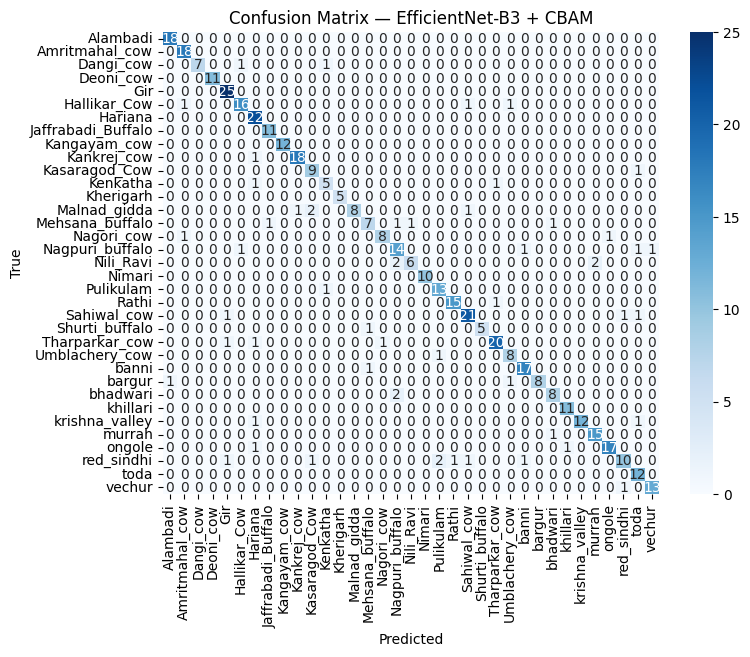

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


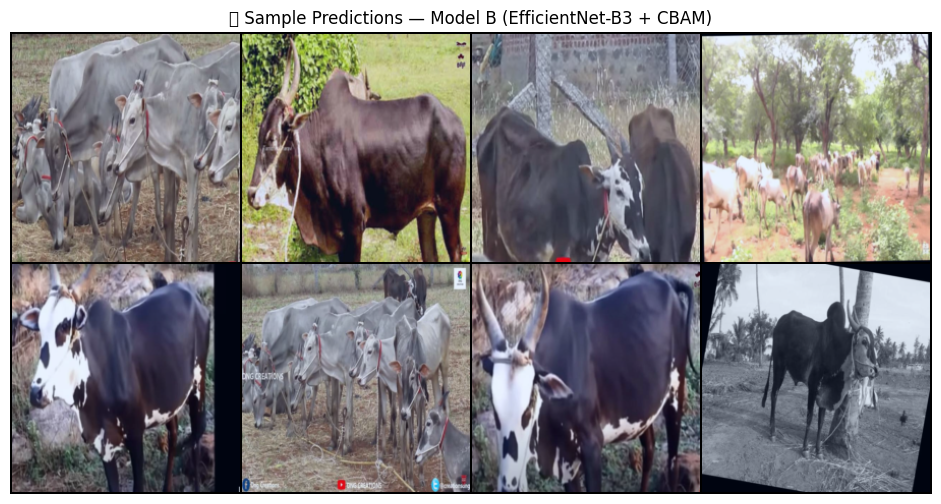

Predicted: ['Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi']
True Labels: ['Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi', 'Alambadi']

✅ Evaluation complete for EfficientNet-B3 + CBAM!


In [ ]:
# ==============================================================
# 🧠 Evaluation — EfficientNet-B3 + CBAM (Model B)
# ==============================================================

import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import timm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from torchvision.utils import make_grid
from collections import defaultdict
import random

# ==============================================================
# ⚙️ Setup
# ==============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

data_dir = "/content/dataset/dataset/model_b"
model_path = "/content/drive/MyDrive/efficientnet_b3_cbam_best.pth"

# ==============================================================
# 📁 Data Transform (same as training)
# ==============================================================
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder(root=data_dir, transform=test_transform)
class_names = dataset.classes
num_classes = len(class_names)
print(f"✅ Detected {num_classes} classes: {class_names}")

# ==============================================================
# ✂️ Stratified Split (get test loader)
# ==============================================================
def stratified_split(dataset, val_frac=0.1, test_frac=0.1):
    label_to_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset.samples):
        label_to_indices[label].append(idx)

    train_idx, val_idx, test_idx = [], [], []
    for label, indices in label_to_indices.items():
        random.shuffle(indices)
        n_total = len(indices)
        n_train = int((1 - val_frac - test_frac) * n_total)
        n_val = int(val_frac * n_total)
        train_idx += indices[:n_train]
        val_idx += indices[n_train:n_train + n_val]
        test_idx += indices[n_train + n_val:]

    return test_idx

test_idx = stratified_split(dataset)
test_loader = DataLoader(Subset(dataset, test_idx), batch_size=32, shuffle=False)
print(f"✅ Test samples: {len(test_idx)}")

# ==============================================================
# 🧩 Define CBAM Module (same as training)
# ==============================================================
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAM, self).__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, padding=3),
            nn.Sigmoid()
        )

    def forward(self, x):
        ca = self.channel_attention(x)
        x = x * ca
        sa = self.spatial_attention(torch.cat([
            x.max(1, keepdim=True)[0],
            x.mean(1, keepdim=True)
        ], dim=1))
        x = x * sa
        return x

# ==============================================================
# 🧠 Rebuild EfficientNet-B3 + CBAM Model
# ==============================================================
base_model = timm.create_model("efficientnet_b3", pretrained=False, num_classes=0)
num_features = base_model.num_features
cbam = CBAM(channels=num_features)

class EfficientNet_CBAM(nn.Module):
    def __init__(self, base_model, cbam, num_classes):
        super(EfficientNet_CBAM, self).__init__()
        self.base = base_model
        self.cbam = cbam
        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(num_features, num_classes)
        )

    def forward(self, x):
        x = self.base.forward_features(x)
        x = self.cbam(x)
        x = self.base.global_pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# ==============================================================
# 💾 Load Trained Weights
# ==============================================================
model = EfficientNet_CBAM(base_model, cbam, num_classes).to(device)
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict)
model.eval()
print("✅ Model loaded successfully!")

# ==============================================================
# 📊 Evaluate on Test Set
# ==============================================================
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# ==============================================================
# 📈 Classification Report & F1-score
# ==============================================================
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

macro_f1 = f1_score(all_labels, all_preds, average='macro')
print(f"🔥 Macro F1 Score: {macro_f1:.4f}")

# ==============================================================
# 🧩 Confusion Matrix
# ==============================================================
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix — EfficientNet-B3 + CBAM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ==============================================================
# 🖼️ Visualize Sample Predictions
# ==============================================================
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(12,6))
grid = make_grid(images[:8].cpu(), nrow=4, normalize=True)
plt.imshow(np.transpose(grid, (1, 2, 0)))
plt.axis('off')
plt.title("🔍 Sample Predictions — Model B (EfficientNet-B3 + CBAM)")
plt.show()

print("Predicted:", [class_names[p] for p in preds[:8]])
print("True Labels:", [class_names[l] for l in labels[:8]])

print("\n✅ Evaluation complete for EfficientNet-B3 + CBAM!")


✅ Model B (EfficientNet-B3 + CBAM) loaded successfully!
📂 Classes detected: 35 total
🧾 Class names: ['Alambadi', 'Amritmahal_cow', 'Dangi_cow', 'Deoni_cow', 'Gir', 'Hallikar_Cow', 'Hariana', 'Jaffrabadi_Buffalo', 'Kangayam_cow', 'Kankrej_cow', 'Kasaragod_Cow', 'Kenkatha', 'Kherigarh', 'Malnad_gidda', 'Mehsana_buffalo', 'Nagori_cow', 'Nagpuri_buffalo', 'Nili_Ravi', 'Nimari', 'Pulikulam', 'Rathi', 'Sahiwal_cow', 'Shurti_buffalo', 'Tharparkar_cow', 'Umblachery_cow', 'banni', 'bargur', 'bhadwari', 'khillari', 'krishna_valley', 'murrah', 'ongole', 'red_sindhi', 'toda', 'vechur']

📸 Testing: image 1.jpg


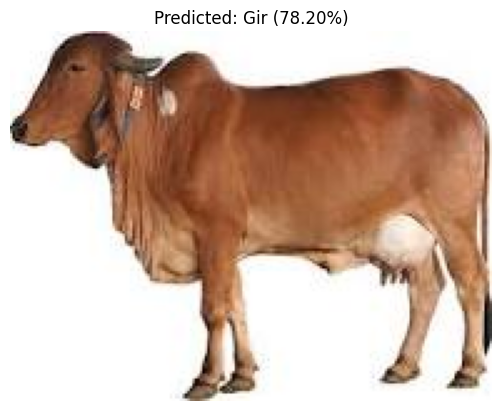

🔍 Top-3 Predictions:
   • Gir: 78.20%
   • krishna_valley: 21.27%
   • Nagpuri_buffalo: 0.06%
✅ Final Prediction: Gir

📸 Testing: sahiwal.jpg


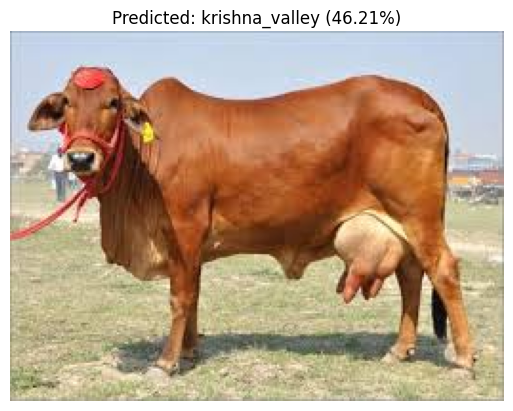

🔍 Top-3 Predictions:
   • krishna_valley: 46.21%
   • red_sindhi: 41.12%
   • Sahiwal_cow: 4.95%
✅ Final Prediction: krishna_valley

📸 Testing: image2.jpg


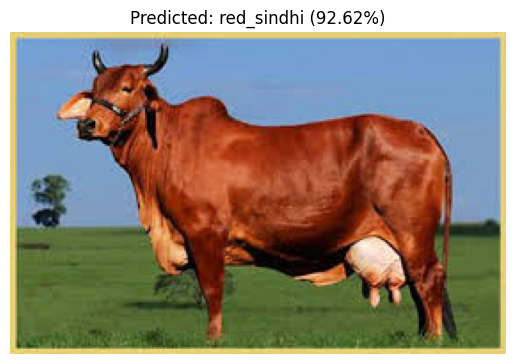

🔍 Top-3 Predictions:
   • red_sindhi: 92.62%
   • krishna_valley: 3.07%
   • Gir: 2.41%
✅ Final Prediction: red_sindhi


In [ ]:
# ============================================================
# 🧪 Manual Testing for Model B (EfficientNet-B3 + CBAM)
# ============================================================

import torch
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import timm
import os
import torch.nn.functional as F

# ============================================================
# 1️⃣ CBAM Module (same as training)
# ============================================================
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAM, self).__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, padding=3),
            nn.Sigmoid()
        )

    def forward(self, x):
        ca = self.channel_attention(x)
        x = x * ca
        sa = self.spatial_attention(torch.cat(
            [x.max(1, keepdim=True)[0], x.mean(1, keepdim=True)], dim=1))
        x = x * sa
        return x


# ============================================================
# 2️⃣ Define Model Architecture (EfficientNet + CBAM)
# ============================================================
class EfficientNet_CBAM(nn.Module):
    def __init__(self, base_model, cbam, num_classes):
        super(EfficientNet_CBAM, self).__init__()
        self.base = base_model
        self.cbam = cbam
        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(base_model.num_features, num_classes)
        )

    def forward(self, x):
        x = self.base.forward_features(x)
        x = self.cbam(x)
        x = self.base.global_pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# ============================================================
# 3️⃣ Load Model and Class Names
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = "/content/dataset/dataset/model_b"  # same as training dataset path

# Get class names from dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]))
class_names = dataset.classes
num_classes = len(class_names)

# Build model
base_model = timm.create_model("efficientnet_b3", pretrained=False, num_classes=0)
cbam = CBAM(channels=base_model.num_features)
model_b = EfficientNet_CBAM(base_model, cbam, num_classes).to(device)

# Load trained weights
model_path = "/content/drive/MyDrive/efficientnet_b3_cbam_best.pth"
model_b.load_state_dict(torch.load(model_path, map_location=device))
model_b.eval()

print("✅ Model B (EfficientNet-B3 + CBAM) loaded successfully!")
print(f"📂 Classes detected: {len(class_names)} total")
print(f"🧾 Class names: {class_names}")


# ============================================================
# 4️⃣ Define Transform for Manual Images
# ============================================================
manual_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


# ============================================================
# 5️⃣ Prediction Function (Top-3 classes)
# ============================================================
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = manual_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model_b(input_tensor)
        probs = F.softmax(outputs, dim=1)
        top3_prob, top3_idx = probs.topk(3, dim=1)

    top3_classes = [class_names[i] for i in top3_idx[0]]
    top3_conf = [p.item() * 100 for p in top3_prob[0]]

    # Display image with prediction
    plt.imshow(image)
    plt.title(f"Predicted: {top3_classes[0]} ({top3_conf[0]:.2f}%)")
    plt.axis("off")
    plt.show()

    print("🔍 Top-3 Predictions:")
    for cls, conf in zip(top3_classes, top3_conf):
        print(f"   • {cls}: {conf:.2f}%")

    return top3_classes[0]


# ============================================================
# 6️⃣ Run on Folder of Manual Test Images
# ============================================================
manual_test_path = "/content/drive/MyDrive/Test_Images_ModelB"  # <--- Put your manual test folder here

for img_file in os.listdir(manual_test_path):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(manual_test_path, img_file)
        print(f"\n📸 Testing: {img_file}")
        pred = predict_image(img_path)
        print(f"✅ Final Prediction: {pred}")
